In [82]:
#Importing the packages
import pandas as pd
import numpy as np
import re
import nltk
!pip install -U spacy
import spacy
!pip3 install transformers
from transformers import pipeline
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:

!python -m spacy download en_core_web_sm

!python -m spacy validate

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.8.4) =================
[i] spaCy installation:
C:\Users\DSL-189\AppData\Roaming\Python\Python311\site-packages\spacy

NAME             SPACY            VERSION                              
en_core_web_sm   >=3.8.0,<3.9.0   3.8.0   [+]



In [84]:
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
#Sample medical text data
medical_texts = [
    "Patient has a history of hypertension and diabetes. Prescribed medication X.",
    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.", 
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and exercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed."
]

medical_df = pd.DataFrame({'MedicalText' : medical_texts})
medical_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DSL-189\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,MedicalText
0,Patient has a history of hypertension and diab...
1,Asthma diagnosis confirmed. Patient advised to...
2,Hypertension patient. Needs regular monitoring...
3,Diabetes patient. Recommended diet and exercise.
4,Patient diagnosed with hypertension. Medicatio...


In [94]:



#Text Preprocessing functions
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [86]:
#Applying Preprocessing  to medical texts
medical_df['CleanedText'] = medical_df['MedicalText'].apply(preprocess_text)
medical_df.head()

,MedicalText,CleanedText
0,Patient has a history of hypertension and diab...,patienthasahistoryofhypertensionanddiabetespre...
1,Asthma diagnosis confirmed. Patient advised to...,asthmadiagnosisconfirmedpatientadvisedtouseinh...
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringofblo...
3,Diabetes patient. Recommended diet and exercise.,diabetespatientrecommendeddietandexercise
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedwithhypertensionmedicationypre...


In [87]:
# Perform NER using spaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [88]:
#Extract entities from medical texts
medical_df['Entities'] = medical_df['MedicalText'].apply(extract_entities)
medical_df.head()

,MedicalText,CleanedText,Entities
0,Patient has a history of hypertension and diab...,patienthasahistoryofhypertensionanddiabetespre...,"[(X., NORP)]"
1,Asthma diagnosis confirmed. Patient advised to...,asthmadiagnosisconfirmedpatientadvisedtouseinh...,"[(daily, DATE)]"
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringofblo...,[]
3,Diabetes patient. Recommended diet and exercise.,diabetespatientrecommendeddietandexercise,[]
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedwithhypertensionmedicationypre...,[]


In [89]:
#Load Sentiment Analysis Pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [90]:
#Perform sentiment analysis on medical texts
medical_df['Sentiment'] = medical_df['MedicalText'].apply(lambda x:sentiment_pipeline(x)[0])
medical_df.head()

,MedicalText,CleanedText,Entities,Sentiment
0,Patient has a history of hypertension and diab...,patienthasahistoryofhypertensionanddiabetespre...,"[(X., NORP)]","{'label': 'NEGATIVE', 'score': 0.9301784634590..."
1,Asthma diagnosis confirmed. Patient advised to...,asthmadiagnosisconfirmedpatientadvisedtouseinh...,"[(daily, DATE)]","{'label': 'NEGATIVE', 'score': 0.965029776096344}"
2,Hypertension patient. Needs regular monitoring...,hypertensionpatientneedsregularmonitoringofblo...,[],"{'label': 'NEGATIVE', 'score': 0.9974162578582..."
3,Diabetes patient. Recommended diet and exercise.,diabetespatientrecommendeddietandexercise,[],"{'label': 'POSITIVE', 'score': 0.9713227152824..."
4,Patient diagnosed with hypertension. Medicatio...,patientdiagnosedwithhypertensionmedicationypre...,[],"{'label': 'NEGATIVE', 'score': 0.9683874845504..."


In [97]:
#Generate WordCloud
all_text = ' '.join(medical_df['CleanedText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

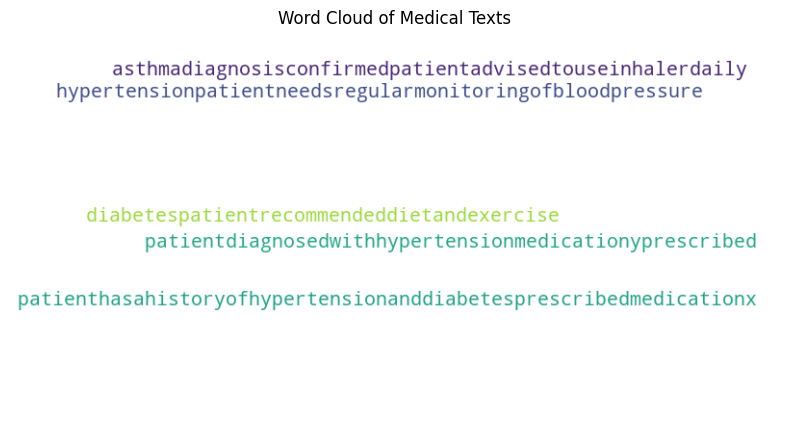

In [100]:
#Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Texts')
plt.show()
# Extract Insights
def extract_insights(row):
    entities = row['Entities']
    sentiment = row['Sentiment']
    return {
        'Entities' : entities,
        'Sentiment' : sentiment['label'],
        'SentimentScore' : sentiment['score']
    }


In [101]:
medical_df['Insights'] = medical_df.apply(extract_insights, axis=1)
medical_df[['MedicalText', 'Insights']].head()

,MedicalText,Insights
0,Patient has a history of hypertension and diab...,"{'Entities': [('X.', 'NORP')], 'Sentiment': 'N..."
1,Asthma diagnosis confirmed. Patient advised to...,"{'Entities': [('daily', 'DATE')], 'Sentiment':..."
2,Hypertension patient. Needs regular monitoring...,"{'Entities': [], 'Sentiment': 'NEGATIVE', 'Sen..."
3,Diabetes patient. Recommended diet and exercise.,"{'Entities': [], 'Sentiment': 'POSITIVE', 'Sen..."
4,Patient diagnosed with hypertension. Medicatio...,"{'Entities': [], 'Sentiment': 'NEGATIVE', 'Sen..."
